# **Percepton classifier**

This homework is aimed at implementing the Perceptron classifier.

The program implements the Perceptron in order to classify the following set of points:
 - (6, 9), (8, 14), (9, 7), (9, 11), (11, 8), (14,2), (16, 5), (17, 10), and (19, 3).

Figure 1 illustrates how such points must be classified.

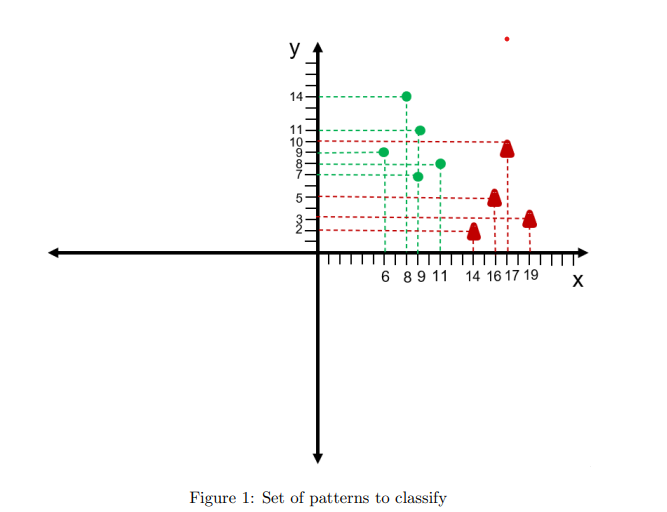

In [152]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [153]:
w0 = 0
w1 = -0.5
w2 = 2

alpha = 0.2
initial_weight = (w0, w1, w2)

In [154]:
green_dots = [(6,9), (8, 14), (9, 7), (9, 11), (11, 8)]
red_triangles = [(14, 2), (16, 5), (17, 10), (19, 3)]

dataset = green_dots + red_triangles

In [155]:
def eval_function(weight, x):
    return (-weight[1]/weight[2] * x) - (weight[0]/weight[2])

In [156]:
def eval_sigma(group, x, y, weight):
    vector = (group, x, y)
    sigma = sum([i*j for (i, j) in zip(vector, weight)])
    return 1 if sigma > 1 else 0

In [157]:
def perceptron(weight):
    weights_changed = True
    weight_history = []
    while weights_changed:
        weights_changed = False
        for coor in dataset:
            group = 1 if coor in green_dots else 0
            x, y = coor
    
            new_weight = (weight[0] + alpha * float((group - eval_sigma(1, x, y, weight))) * 1,
                        weight[1] + alpha * float((group - eval_sigma(1, x, y, weight))) * x,
                        weight[2] + alpha * float((group - eval_sigma(1, x, y, weight))) * y)
    
            if new_weight != weight:
                weight = new_weight
                weights_changed = True
                weight_history.append(new_weight)
        
    return weight_history

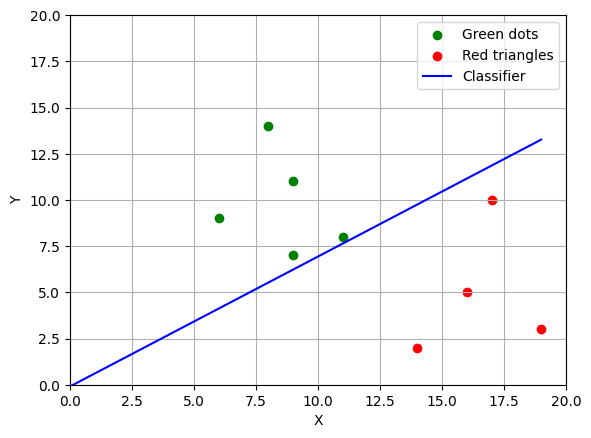

In [158]:
weights = perceptron(initial_weight)

fig, ax = plt.subplots()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0, 20)  # Limitar el eje X hasta 20
ax.set_ylim(0, 20)  # Limitar el eje Y hasta 20
ax.scatter([coor[0] for coor in green_dots], [coor[1] for coor in green_dots], label='Green dots', color='green')
ax.scatter([coor[0] for coor in red_triangles], [coor[1] for coor in red_triangles], label='Red triangles', color='red')
ax.grid(alpha=1.0)

lines = []  # Para almacenar las líneas del gráfico

for i, w in enumerate(weights):
    if len(lines) == 2:
        lines[0].remove()  # Eliminar la línea más antigua si hay dos líneas presentes
        del lines[0]  # Eliminar la referencia de la lista
    
    if len(lines) == 1:
        lines[0].set_alpha(0.2)
        if i == len(weights) - 1: # Hacer la línea anterior transparente
            lines[0].remove() 
    
    line, = ax.plot([x for x in range(20)], [eval_function(w, x) for x in range(20)], label='Classifier', color='blue')
    lines.append(line)
    
    ax.legend()
    display(fig)
    clear_output(wait=True)
        
    time.sleep(0.8)

plt.ioff()
plt.show()